<h2> ======================================================</h2>
 <h1>MA477 - Theory and Applications of Data Science</h1> 
  <h1>Lesson 7: Linear Regression </h1> 
 
 <h4>Dr. Valmir Bucaj</h4>
 United States Military Academy, West Point 
AY20-2
<h2>======================================================</h2>

<h2>Lecture Outline</h2>

<ul>
    <li>What is Linear Regression?</li>
    <li>How does it work?</li>
    <li>Estimating the coeficients</li>
    <li> Assessing the accuracy of the coefficient estimates</li>
    <li>Assesing the accuracy of the model</li>
    <li>Dealing with qualitative predictors</li>
    <li>Problems to look out for</li>
    
</ul>

<h3> What is Linear Regression?</h3>

Linear regression is a simple supervised statistical learning technique used for predicting quantitative a response target. Though linear regression is one of the simplest and oldest statistical learning techniques it is still very useful and widely used to this day for many reasons. 

Linear regression is a good starting point for the newer and more sophisticated machine-learning techniques, many of which may be seen as generalizations of linear regresssion, thus, having a good understanding of linear regression proves invaluable in studying these newer and more sophisticated methods. 

 Throughoug this lecture we will use a portion of the `Boston Dataset` to illustrate many aspects of Linear Regresson.
 
 Before we continue with the rest of the lecture, let's go ahead and import some libraries: 

In [128]:
import numpy as np
import pandas as pd

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

Next let's go ahead and read in the `Boston_Dataset` in the folder for Lesson 7. This dataset is a subset of the famous `Boston` dataset that has been used often in illustrating different regression machine-learning techniques. 

<h3> Description of Boston house prices dataset</h3>


**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 8 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - CHAS     Charles River dummy variable (= Yes if tract bounds river; No otherwise)
        - RM       average number of rooms per dwelling
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - LSTAT    % lower status of the population
        
     :Target
        -Price in $10,000

In [130]:
boston=pd.read_excel('Boston_Dataset.xlsx',index_col=[0])

In [131]:
boston.head()

,CRIM,CHAS,RM,DIS,RAD,TAX,PTRATIO,LSTAT,Price
Unnamed: 0,,,,,,,,,
0,0.00632,No,6.575,4.0900,1,296,15.3,4.98,24.0
1,0.02731,No,6.421,4.9671,2,242,17.8,9.14,21.6
2,0.02729,No,7.185,4.9671,2,242,17.8,4.03,34.7
3,0.03237,No,6.998,6.0622,3,222,18.7,2.94,33.4
4,0.06905,No,7.147,6.0622,3,222,18.7,5.33,36.2


<font color='red' size='4'>Mock Scenario</font>

Imagine the following scenario: Your team has been contracted by a real-estate company who owns many houses in the Boston metro-area. You are tasked to analyze if the house prices owned by the company are competitive and if they need to be adjusted to optimize the overall profit. 

Below are some questions that your team might want to address before making recommendations:

<ul>
    <li>Is there a relationship between the different <b>predictors/features</b> and the house <b>prices</b> </li>
    <li> If there is such a relationship, then how strong is it?</li>
    <li> Which features affect the most the house prices?</li>
    <li> How accurately can we estimate the effect of each feature to the house prices?</li>
    <li> How accurately can we predict the house prices based on these features?</li>
    <li>What kind of relationship is there between the features and the house prices? Linear?Non-linear?</li>
    <li> Is there any <b>interaction</b> effect among the features?</li>
    
 </ul>
 
We will attempt to address all of these questions using linear regression. 

You are already familiar with linear regression, so we will not spend much time on the theory behind simple linear regression.

<h3> Multiple Linear Regression</h3>

Let $X=(X_1,\dots,X_p)$ be $p$ predictors and let $Y$ be the response variable. Assuming there is some relationship between $X$ and $Y$ we have $$Y=f(X)+\epsilon$$ where, as per usual, $\epsilon$ represents a random error. 

If we suspect that the relationship between $X$ and $Y$ is linear, then we have

$$f(X)=\beta_0+\sum_{i=1}^p\beta_iX_i=\beta_0+\beta_1X_1+\dots+\beta_pX_p$$ where $\beta_0,\dots,\beta_p$ are some unknown coefficients that need to be estimated.

So, we have $$Y=\beta_0+\beta_1X_1+\dots+\beta_pX_p+\epsilon$$

<h4>Estimating Coefficients</h4>

The goal is to find estimates $\widehat{\beta}_0,\widehat{\beta}_1,\dots,\widehat{\beta}_p$, which then in turn allow us to make predictions using the formula $$\widehat{Y}=\widehat{\beta}_0+\widehat{\beta}_1X_1+\dots+\widehat{\beta}_pX_p.$$


How do we estimate the coefficients $\beta_0,\beta_1,\dots,\beta_p$?

There are actually many methods that may be used to estimate the coefficients in a linear model, each of which gives rise to a slightly different linear model.  

In this course we will learn about three of them:
<ul>
    <li>Least Squares (LS)</li>
    <li> Least Squares + $\ell^2$-regularization (Ridge Method)</li>
    <li> Least Squares + $\ell^1$-regularization (Lasso Method)</li>
</ul>

You are already familiar with the Least Squares method, which is the simplest form of linear regresssion and is what typically people refer to when talking about linear regression. 

In this lecture we will focus on the Least Squares, and talk about the other two in the next lectures. 

In the LS method we pick the coefficients $\widehat{\beta}_0,\widehat{\beta}_1,\dots,\widehat{\beta}_p$ such that the Residual Sum of Squares (RSS) is minimized; that is coefficients that minimize the quantity:

$$RSS=\sum_{i=1}^n\left(y_i-\widehat{y}_i\right)^2=\sum_{i=1}^n\left(y_i-\widehat{\beta}_0-\widehat{\beta}_1x_{i1}-\dots-\widehat{\beta}_px_{ip}\right)^2$$ where $n$ represents the number of samples. 

<b>Example</b>

In the case of the Boston housing data, the model would look like this:

$$\widehat{Price}=\hat{\beta_0}+\hat{\beta_1}\times (CRIM) +\hat{\beta_2}\times (CHAS) +\hat{\beta_3}\times (RM)+\hat{\beta_4}\times (DIS)+\hat{\beta_5}\times	(RAD)+\hat{\beta_6}\times (TAX)+\hat{\beta_7}\times(PTRATIO)+\hat{\beta_8}\times (LSTAT)$$

The simplest form of linear regression is when $p=1$. For example, if we were trying to predict the house pricing only based on the average number of rooms per house (RM), then the model would look like this:

$$\hat{y}=\beta_0+\beta_1\times(RM)$$

Below, is a scatterplot along with the line of best fit $\hat{y}$.

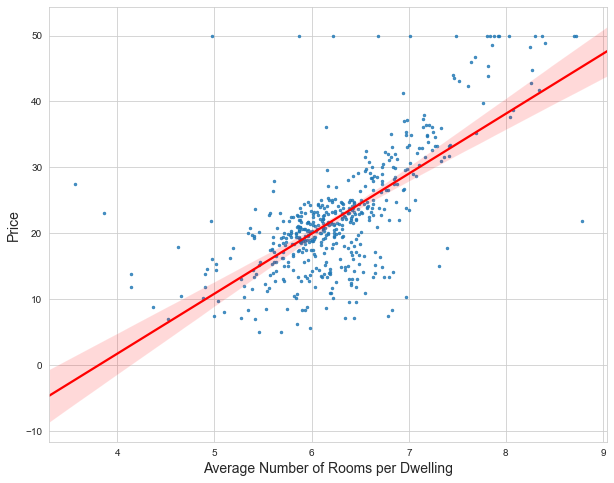

In [189]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.regplot(x='RM',y='Price',data=boston,scatter_kws={'s':6},line_kws={'color':'r'},ci=95)
plt.xlabel("Average Number of Rooms per Dwelling",fontsize=14)
plt.ylabel('Price',fontsize=14)
plt.show()

We will discuss many more qualitative and theoretical aspects of linear regression as we go along, but for now let's turn to implementing linear regression with Python.

<h2>Linear Regression with Python</h2>

As we mentioned above, we will build a linear regression model for the Boston Housing dataset.

Normally, in real projects, one would start by coducting some exploratory analysis. Basically, use our knowledge of visualization tools to gain insights about our data. For now, we will skip this part, but I urge you on your own time to explore the data by building some pairplots, distribution plots, heat-maps of the correlation matrices, boxplots etc.

<h3>Data Preprocessing</h3>

Before we can fit the linear regression (or any machine-learning model) to our data, we need to prepare it first.

Let's check out the head of the dataset:

In [190]:
boston.head()

,CRIM,CHAS,RM,DIS,RAD,TAX,PTRATIO,LSTAT,Price
Unnamed: 0,,,,,,,,,
0,0.00632,No,6.575,4.0900,1,296,15.3,4.98,24.0
1,0.02731,No,6.421,4.9671,2,242,17.8,9.14,21.6
2,0.02729,No,7.185,4.9671,2,242,17.8,4.03,34.7
3,0.03237,No,6.998,6.0622,3,222,18.7,2.94,33.4
4,0.06905,No,7.147,6.0622,3,222,18.7,5.33,36.2


The first thing to notice is that the $CHAS$ is a qualitative feature, it consists of $Yes$ for the areas that bound the Charles River and $No$ otherwise. 

Linear regression models do not directly handle qualitative features, so before we can even begin we are forced to deal with qualitative variables. The easiest (but maybe not always the smartest) thing to do is simply drop entirely $CHAS$. 

However, a smarter move is to replace it with a `dummy variable`. In other words, we can code the answer $Yes$ as a $1$ and the answer $No$ as a $0$.

<font color='red' size='4'> Exercise</font>

Using the `.apply()` method, replace $Yes$ and $No$ with $1$ and $0$ respectively and save the updated table under `df`.

In [202]:
#Enter Answer Here


In [204]:
df.head()

,CRIM,CHAS,RM,DIS,RAD,TAX,PTRATIO,LSTAT,Price
Unnamed: 0,,,,,,,,,
0,0.00632,0,6.575,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0,6.421,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0,7.185,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0,6.998,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0,7.147,6.0622,3,222,18.7,5.33,36.2


Pandas also has a built-in method `pd.get_dummies()` to convert qualitative features into quantitative ones by assigning dummy variables:

In [205]:
df_new=boston.copy()

In [206]:
df_new=pd.get_dummies(df_new,columns=['CHAS'],drop_first=True)

In [207]:
df_new.head()

,CRIM,RM,DIS,RAD,TAX,PTRATIO,LSTAT,Price,CHAS_Yes
Unnamed: 0,,,,,,,,,
0,0.00632,6.575,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,6.421,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,7.185,4.9671,2,242,17.8,4.03,34.7,0
3,0.03237,6.998,6.0622,3,222,18.7,2.94,33.4,0
4,0.06905,7.147,6.0622,3,222,18.7,5.33,36.2,0


I will continue to use the `df` dataframe.

<h3> Scaling Data</h3>

Many of the measurements are in different scales, so in this case it is particularly important that we scale the data before we fit a linear regression.

<font size='4' color='red'>Exercise</font>

Scale the data, excluding the response variable <b>price</b>, to have mean zero and standard deviation one. 

Step 1: Import the `StandardScaler` from `sklearn.preprocessing`

Step 2: Save the features on a new dataframe called `X` and the response variable under `y` and check the head of `X`.

In [220]:
X.head()

,CRIM,CHAS,RM,DIS,RAD,TAX,PTRATIO,LSTAT
Unnamed: 0,,,,,,,,
0,0.00632,0,6.575,4.0900,1,296,15.3,4.98
1,0.02731,0,6.421,4.9671,2,242,17.8,9.14
2,0.02729,0,7.185,4.9671,2,242,17.8,4.03
3,0.03237,0,6.998,6.0622,3,222,18.7,2.94
4,0.06905,0,7.147,6.0622,3,222,18.7,5.33


Step 3: Perform the scaling

After scaling the data, create a new dataframe of the scaled data called `X_sc` and check the head

In [222]:
X_sc.head()

,CRIM,CHAS,RM,DIS,RAD,TAX,PTRATIO,LSTAT
0,-0.419782,-0.272599,0.413672,0.140214,-0.982843,-0.666608,-1.459000,-1.075562
1,-0.417339,-0.272599,0.194274,0.557160,-0.867883,-0.987329,-0.303094,-0.492439
2,-0.417342,-0.272599,1.282714,0.557160,-0.867883,-0.987329,-0.303094,-1.208727
3,-0.416750,-0.272599,1.016303,1.077737,-0.752922,-1.106115,0.113032,-1.361517
4,-0.412482,-0.272599,1.228577,1.077737,-0.752922,-1.106115,0.113032,-1.026501


<h3> Train-Test Split</h3>

<font size='4' color='red'>Exercise</font>

Split the scaled data into a training set and a test set with a 70-30 split.

Step 1: Import `train_test_split` from `sklearn.model_selection`

Check the head of `X_train, X_test`

In [226]:
X_train.head()

,CRIM,CHAS,RM,DIS,RAD,TAX,PTRATIO,LSTAT
13,-0.347230,-0.272599,-0.478164,0.433754,-0.637962,-0.601276,1.176466,-0.615792
61,-0.400535,-0.272599,-0.453945,1.437258,-0.178120,-0.737880,0.575395,0.250482
377,0.722674,-0.272599,0.725672,-1.158495,1.661245,1.530926,0.806576,1.203663
39,-0.417302,-0.272599,0.442165,0.763470,-0.752922,-0.927937,-0.071913,-1.168077
365,0.109664,-0.272599,-3.880249,-1.037181,1.661245,1.530926,0.806576,-0.775590


In [227]:
X_test.head()

,CRIM,CHAS,RM,DIS,RAD,TAX,PTRATIO,LSTAT
307,-0.414778,-0.272599,0.804028,-0.291089,-0.293081,-1.106115,-0.025677,-0.718119
343,-0.417558,-0.272599,0.586056,0.920817,-0.523001,-0.227101,-0.395567,-0.767180
47,-0.393837,-0.272599,-0.362767,0.900519,-0.752922,-1.040783,-0.256858,0.861639
67,-0.413781,-0.272599,-0.579315,1.284902,-0.637962,-0.375583,0.205505,-0.638220
362,0.007529,-0.272599,-1.314439,-0.804060,1.661245,1.530926,0.806576,-0.345257


<h3> Fitting the Model</h3>

First, we need to import Linear Regression model

In [229]:
from sklearn.linear_model import LinearRegression

Next, we instansiate and fit it to our model

In [230]:
lg=LinearRegression()

In [234]:
lg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now that we have fitted our model, we can actually go ahead and extract the estimated coefficients, including the intercept $\beta_0$

In [237]:
lg.intercept_

22.605596398342957

In [239]:
lg.coef_

array([-0.63082368,  0.57150473,  2.24918842, -1.09485652,  1.85711767,
       -1.88803821, -2.046749  , -4.55974378])

<font color='red' size=4>Exercise</font>

Create a dataframe named `df_coef` that contains one column with the coefficients and the rows are the features of the Boston dataset.

In [240]:
#Enter Answer Here


In [246]:
df_coef

,Coefficients
CRIM,-0.630824
CHAS,0.571505
RM,2.249188
DIS,-1.094857
RAD,1.857118
TAX,-1.888038
PTRATIO,-2.046749
LSTAT,-4.559744
Intercept,22.605596


How do we interpret these coefficients? What do they mean and what do they tell us?

For example,if the average number of rooms per dwelling,`RM`, increases by one unit, we will observe an increase in house price by roughly $2.2\times \$10,000=\$22,000$

On the other hand, if the pupil-teacher ratio by town, `PTRATIO`, increases by one unit, then we will observe a decrease in house price of roughly $2.05\times \$10,000=\$20500.$

<h3>Assesing Performance of Model</h3>

Now that our model is fit, we need to asses the performance of our model by testing it on the test-set. 

In [232]:
lg_pred=lg.predict(X_test)

`lg_pred` contains the predicted house prices.

<font color='red' size=4> Exercise</font>

Build a scatterplot to plot `y_test` vs. `lg_pred` to obtain a visual display of how well our model is performing.

Text(0, 0.5, 'lg_pred')

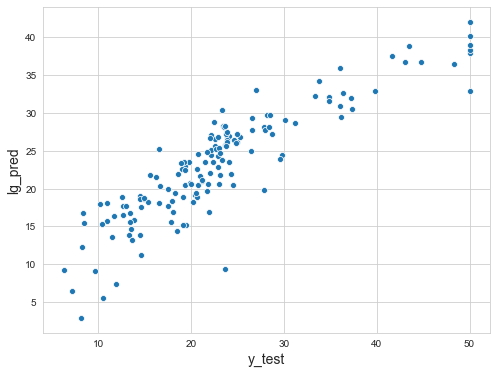

From the scatterplot, since it is following a straight line, it seems that our model may be doing fairly well. 

Next, let's compute some quantitative metrics such as R2 score and MSE:

In [251]:
from sklearn.metrics import r2_score, mean_squared_error

In [253]:
lg_r2=r2_score(y_test,lg_pred)
mse=mean_squared_error(y_test,lg_pred)

In [254]:
lg_r2

0.7724279093804107

In [255]:
mse

20.858003244422935

So, looking at the R2 score, we may say that around $77\%$ of the variance in the response variable, Price, is explained by the eight measured features. Overall, this seems like a fairly good result. 

<h2> Important Questions</h2>

<h3> Is the relationship between the response and features linear?</h3>

One way to answer this question is by obtaining the distribution of the residuals. Visually, we may do this by building a distribution plot of the residuals. Let's do this first, and then we'll talk about how to interpret the results, and what insights we can hope to gain.

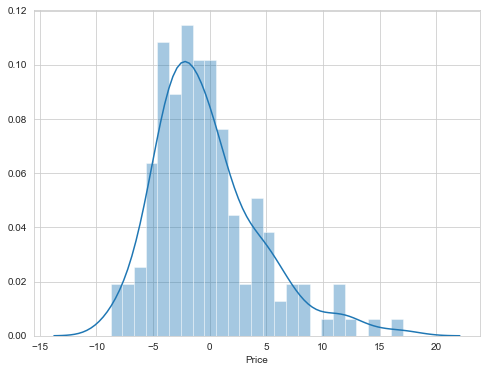

In [269]:
plt.figure(figsize=(8,6))
sns.distplot((y_test-lg_pred), bins=25)

<h4> Interpretation</h4>

If the distribution is normal, or close to normal, then this is good empirical evidence that the relationship between the response and features is linear. Why is this?

To get a better idea of why this is the case, let's suppose we have done a superb job with our assumptions and estiamtions of $f$ and thus $\hat{f}\approx f$. Now, let's compute the residuals:

$$e_i=y_i-\hat{y_i}=f(x_i)+\epsilon_i-\hat{f}(x_i)\approx \epsilon_i$$

Recall that $\epsilon_i$ are assumed to come from a normal distribution with mean zero. Hence, we expect the distribution of the residuals to be close to a normal distribution with mean zero if indeed the relationship between the response and predictors is linear.

-----------------

Next time we will discuss other ways of checking for linearity, we will discuss outliers, heteroscedasticity, how to determine the statistical significance of each of the regression coefficients etc. 